In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tables

DATA_DIR = "/home/camata/work/kaggle-multimodal/"
FP_CELL_METADATA = os.path.join(DATA_DIR,"metadata.csv")

FP_CITE_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_cite_inputs.h5")
FP_CITE_TRAIN_TARGETS = os.path.join(DATA_DIR,"train_cite_targets.h5")
FP_CITE_TEST_INPUTS = os.path.join(DATA_DIR,"test_cite_inputs.h5")

FP_MULTIOME_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_multi_inputs.h5")
FP_MULTIOME_TRAIN_TARGETS = os.path.join(DATA_DIR,"train_multi_targets.h5")
FP_MULTIOME_TEST_INPUTS = os.path.join(DATA_DIR,"test_multi_inputs.h5")



In [2]:
# ler dados dos arquivos
cell_metadata_df = pd.read_csv(FP_CELL_METADATA, index_col='cell_id')
cell_metadata_df = cell_metadata_df[cell_metadata_df.technology=="citeseq"]
cell_metadata_df.shape


(119651, 4)

In [3]:
cell_metadata_df.head()

,day,donor,cell_type,technology
cell_id,,,,
c2150f55becb,2,27678,HSC,citeseq
65b7edf8a4da,2,27678,HSC,citeseq
c1b26cb1057b,2,27678,EryP,citeseq
917168fa6f83,2,27678,NeuP,citeseq
2b29feeca86d,2,27678,EryP,citeseq


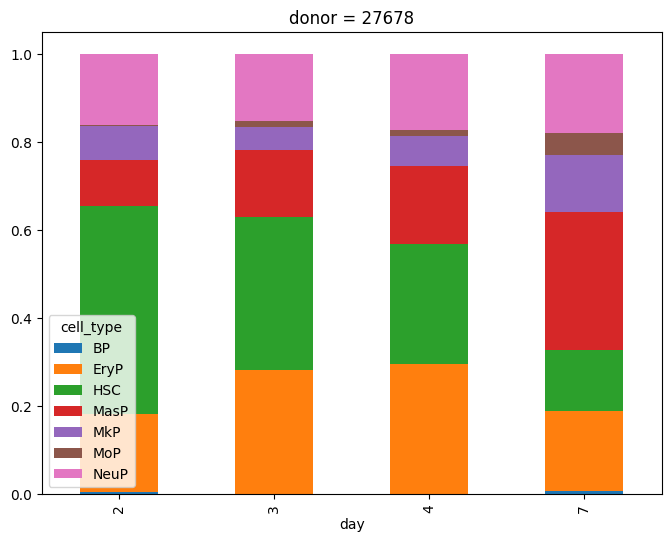

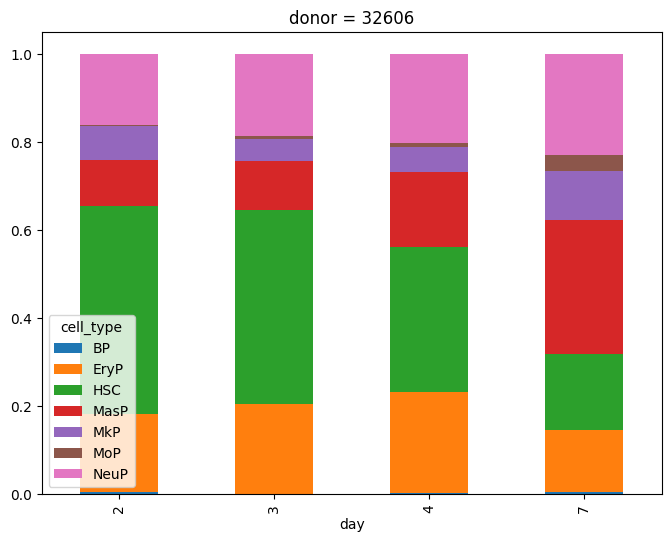

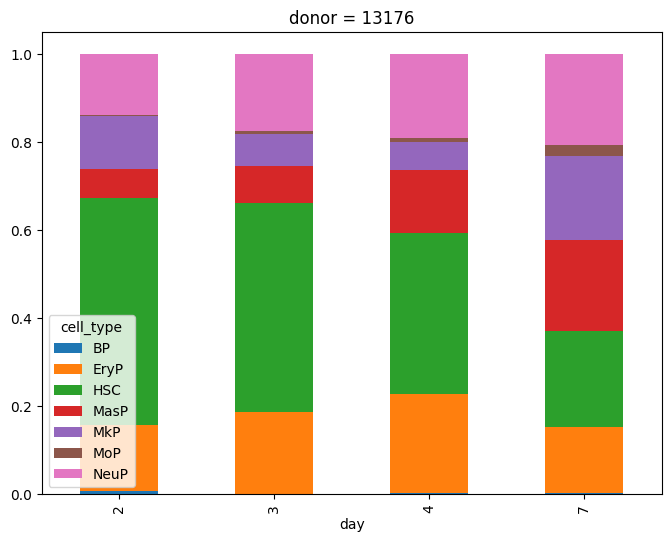

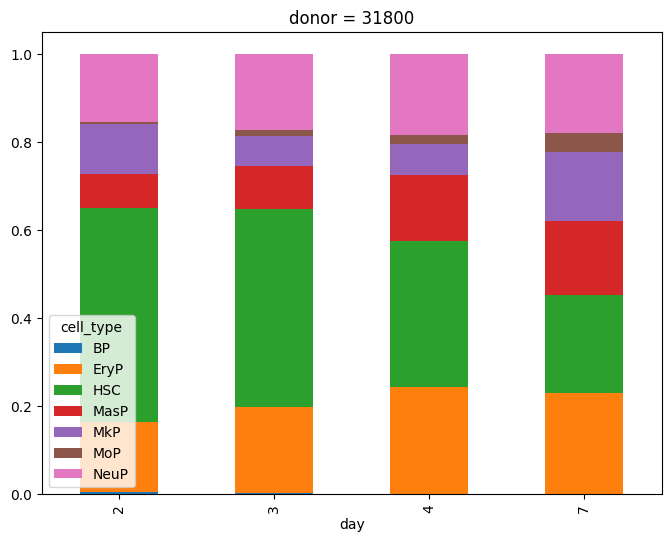

In [4]:
donors = cell_metadata_df.donor.unique()
for donor in donors:
    matched_df    = cell_metadata_df[cell_metadata_df.donor == donor]
    grouped_count = matched_df.groupby(['day', 'cell_type'])['cell_type'].count() / matched_df.groupby(['day'])['day'].count()
    grouped_count.unstack().plot(kind='bar', stacked=True, figsize=(8, 6),
                                title = 'donor = {donor}'.format(donor=donor))


In [5]:
# Para cada cell_id localizar a cell_id nba base de dados e obter os genes
cite_train_input_df = pd.read_hdf(FP_CITE_TRAIN_INPUTS)
cite_train_const_columns = cite_train_input_df.columns[(cite_train_input_df).nunique() == 1]
print('Length of the const columns in the cite train data is {num:d}.\n'.format(num=len(cite_train_const_columns)))


Length of the const columns in the cite train data is 449.



In [7]:
cite_test_input_df = pd.read_hdf(FP_CITE_TEST_INPUTS)
cite_test_input_const_columns = cite_test_input_df.columns[(cite_test_input_df).nunique() == 1]
print('Length of the const columns in the cite test data is {num:d}.\n'.format(num=len(cite_test_input_const_columns)))
   

Length of the const columns in the cite test data is 745.



In [8]:
all_cite_const_columns = cite_train_const_columns.union(cite_test_input_const_columns)
print('Length of all const columns is {num:d}.\n'.format(num=len(all_cite_const_columns)))
#print(all_cite_const_columns.to_list())
display(all_cite_const_columns)

Length of all const columns is 1194.



Index(['ENSG00000003137_CYP26B1', 'ENSG00000004848_ARX',
       'ENSG00000006606_CCL26', 'ENSG00000010379_SLC6A13',
       'ENSG00000010932_FMO1', 'ENSG00000017427_IGF1',
       'ENSG00000022355_GABRA1', 'ENSG00000041982_TNC',
       'ENSG00000060709_RIMBP2', 'ENSG00000064886_CHI3L2',
       ...
       'ENSG00000285611_AC007132.1', 'ENSG00000285629_AL031847.2',
       'ENSG00000285641_AL358472.6', 'ENSG00000285649_AL357079.2',
       'ENSG00000285650_AL157827.2', 'ENSG00000285662_AL731733.1',
       'ENSG00000285672_AL160396.2', 'ENSG00000285763_AL358777.1',
       'ENSG00000285865_AC010285.3', 'ENSG00000285879_AC018628.2'],
      dtype='object', name='gene_id', length=1194)

In [49]:
#cite_test = cite_test_input_df.drop(columns=cite_test_input_const_columns)

cells_type = cell_metadata_df.cell_type.unique()
display(cells_type)


array(['HSC', 'EryP', 'NeuP', 'MasP', 'MkP', 'BP', 'MoP'], dtype=object)

In [65]:
#  Obter todos os ids de um tipo de celula
matched_cell_type = cell_metadata_df[cell_metadata_df.cell_type=='HSC']
indexes = matched_cell_type.index


(42874,)

In [72]:
print(cite_test_input_df.shape)

#obtem os valores por linha que pode ser escritos em arquivos
for i in range(len(indexes)):
    if indexes[i] in cite_test_input_df.index: 
        row = cite_test_input_df.loc[indexes[i]].values 


(48663, 22050)
